## Assignment 1

Student Name: Daniel Babbev

Student id: 11712624
***

Deadline: March 31

### Question 1: Dealing with data Pythonically

In [1]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np

1\. The file `"data/ads_dataset.tsv"` uses tabs instead of commas to separate fields. Load the data set `"data/ads_dataset.tsv"` into a Python `pandas` data frame called `ads`. If you are using the `read_csv()` function you will need to know that `"\t"` means tab when trying to set the delimeter.

In [2]:
# Place your code here
ads = pd.read_csv("data/ads_dataset.tsv", sep="\t")

2\. Write a Python function called `getDfSummary()` that does the following:
- Takes as input a data frame
- Creates a new data frame called `output_data` that:
  - Consists of the output of the `pandas` function `describe()`. (*Hint: Check the `pandas` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) for this function if you want to learn more.*)
  - The data frame `output_data` should have the original feature names from `input_data` as **rows**. (*Hint: Are they rows by default? If not, how could you make them rows?*)
  - Adds a column called `spread` that is the result of subtracting the `min` from the `max`. (*Hint: What does the `describe()` function return? Do we have a column called `max` and `min`?*)
- Returns the new `output_data` data frame.

In [3]:
def getDfSummary(input_data):
    # Place your code here
    desc = input_data.describe()
    output_data = desc.transpose()
    output_data["spread"] = desc.iloc[desc.index.get_loc("max")] - desc.iloc[desc.index.get_loc("min")]

    return output_data

3\. How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.

*Hint: `%timeit getDfSummary(ads)`*

In [4]:
# Place your code here
%timeit getDfSummary(ads)

42.6 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


4\. Show the output of the `getDfSummary()` function you created.

In [5]:
# Place your code here
summary_ads = getDfSummary(ads)
summary_ads

,count,mean,std,min,25%,50%,75%,max,spread
isbuyer,54584.0,0.042632,0.202027,0.0000,0.0,0.0,0.000000,1.00000,1.00000
buy_freq,2327.0,1.240653,0.782228,1.0000,1.0,1.0,1.000000,15.00000,14.00000
visit_freq,54584.0,1.852777,2.921820,0.0000,1.0,1.0,2.000000,84.00000,84.00000
buy_interval,54584.0,0.210008,3.922016,0.0000,0.0,0.0,0.000000,174.62500,174.62500
sv_interval,54584.0,5.825610,17.595442,0.0000,0.0,0.0,0.104167,184.91670,184.91670
expected_time_buy,54584.0,-0.198040,4.997792,-181.9238,0.0,0.0,0.000000,84.28571,266.20951
expected_time_visit,54584.0,-10.210786,31.879722,-187.6156,0.0,0.0,0.000000,91.40192,279.01752
last_buy,54584.0,64.729335,53.476658,0.0000,18.0,51.0,105.000000,188.00000,188.00000
last_visit,54584.0,64.729335,53.476658,0.0000,18.0,51.0,105.000000,188.00000,188.00000
multiple_buy,54584.0,0.006357,0.079479,0.0000,0.0,0.0,0.000000,1.00000,1.00000


5\. Using the results returned from `getDfSummary()`, which fields, if any, have a spread of 1? Full credit will be given for a code based approach that prints out the correct field names. Partial credit will be given if you simply manually explore the results of `getDfSummary()`. Print each field name on a line by itself.

In [6]:
# Place your code here
spread_one_fields = list()
for i, r in summary_ads.iterrows():
    if (r["spread"] == 1):
        spread_one_fields.append(i)
        print(i)

isbuyer
multiple_buy
multiple_visit
y_buy


6\. For the fields that have a spread of 1, what percentage of records have the value of `1`? You may assume that if a field had a spread of 1 that it only has values 1 and 0.

Full credit will be given for a code based approach that prints out the correct field names **and** their respective percentages. Partial credit will be given if you simply manually explore the results of `getDfSummary()`. (*Hint: Using the `pandas` function `.get_value()` may be useful if you happen to know the row and column name you want.*)

Your results should look something like this:

`The field` **`xxx`** `has` **`yyy`** `percent of its records set to 1.`

In [7]:
# Place your code here
for f in spread_one_fields:
    ok = 0
    for v in ads[f]:
        if (v == 1):
            ok += 1
    print("The field {} has {:.3f} % of its recors set to 1".format(f , ok / len(ads[f]) * 100))

The field isbuyer has 4.263 % of its recors set to 1
The field multiple_buy has 0.636 % of its recors set to 1
The field multiple_visit has 27.744 % of its recors set to 1
The field y_buy has 0.464 % of its recors set to 1


### Question 2. Functions, loops and plotting

1\. Write a function called `squared_less_100()` that takes a single number, squares it, and then returns the square minus 100.

In [8]:
def squared_less_100(input_number):
    output_number = (input_number * input_number) - 100    
    return output_number

2\. Create three empty lists called `sl1_results`, `absolute_results`, `log_results`.

In [9]:
sl1_results = list()
absolute_results = list()
log_results = list()

3\. Create a list of integers from 1 to 20 (including both 1 and 20) called `original_set`. Loop through this list and apply your `squared_less_100()` function, the `numpy` function for finding absolute value, and the `numpy` natural log function. Store the result of each function by appending it the the initially empty lists you created in Part 4 Question 2. (*Hint: If you don't know what the `numpy` functions for absolute value or natural logs are, simply search online and it will be one of the first results. Although, you can probably guess what they would be!*)

In [10]:
# Code here!
import numpy as np
original_set = list(range(1, 21))

for i in original_set:
    sl = squared_less_100(i)
    sl1_results.append(sl)
    absolute_results.append(np.absolute(sl))
    log_results.append(np.log(sl))

/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


4\. Create a plot of your results. On the x-axis put `original_set`. Now, all within the **same plot** put a line for the `sl1_results`, a line for `absolute_results`, and a line for `log_results`. Don't forget to add a legend so that I know which line is for which set of results!

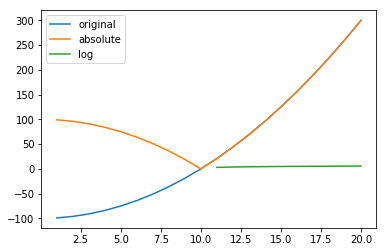

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(original_set, sl1_results, label="original")
plt.plot(original_set, absolute_results, label = "absolute")
plt.plot(original_set, log_results, label="log")
plt.legend()
plt.show()

### Question 3: Decision trees vs. Linear discriminant models
What are the similarities and differences of decision trees and linear discriminant models? When might you prefer to use one over another? **This explanation should be around 1 paragraph

Answer here

### Question 4. Modeling

For your hands-on excercise, I am going to ask you to build two different models and show me the impact of training/fitting them with different amounts of data. For this example we will be using the `data/cell2cell.csv` data.

These historical data consist of 31,892 customers: 15,855 customers that churned (i.e., left the company) and 16,036 that did not churn. Here are the data set's 12 columns:

```
Col.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
12    churndep   Did the customer churn (1=Yes; 0=No)
```

The first 11 columns are our attributes/features. The last column, `"churndep"`, is the target variable.

1\. Now you should create a decision tree using entropy with no max depth and a logistic regression. For each of these models, assign 10% to 90% of the data to training (in increments of 10%) and the rest to test. For each training set, you need to fit both models and then get the accuracy on the remaining data used for test for both models. 

Then create a plot where the x-axis includes 0.10 to 0.90 (one tick for each training data percentage) and the y-axis indicates accuracy. Your plot should have two lines/curves on it: one for the decision tree and one for logistic regression. 

Follow the template provided.

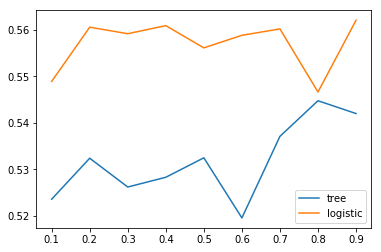

In [118]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
%matplotlib inline

# Read CSV
data = pd.read_csv("data/cell2cell.csv")
data.head()

# Prepare features into X and target into Y
X = data.drop(["churndep"], axis=1)
y = data["churndep"]

# Prepare to do some training and testing
training_percentages = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
tree_accuracies = []
logistic_accuracies = []

for training_percentage in training_percentages:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = training_percentage)

    # Create both models
    tree = DecisionTreeClassifier(criterion='entropy')
    logistic = LogisticRegression()

    # Fit both models
    tree.fit(X_train, y_train)
    logistic.fit(X_train, y_train)
    
    # Get the predictions
    Y_test_predicted_tree = tree.predict(X_test)
    Y_test_predicted_logistic = logistic.predict(X_test)
    
    # Get accuaracy of both models
    tree_acc = accuracy_score(y_test, Y_test_predicted_tree)
    logistic_acc = accuracy_score(y_test, Y_test_predicted_logistic)
    
    tree_accuracies.append(tree_acc)
    logistic_accuracies.append(logistic_acc)
    
plt.plot(training_percentages, tree_accuracies, label="tree")
plt.plot(training_percentages, logistic_accuracies, label="logistic")
plt.legend()

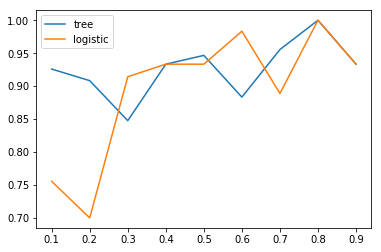

In [116]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()

# Prepare to do some training and testing
training_percentages = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
tree_accuracies = []
logistic_accuracies = []

for training_percentage in training_percentages:
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = training_percentage)

    # Create both models
    tree = DecisionTreeClassifier(criterion='entropy')
    logistic = LogisticRegression()

    # Fit both models
    tree.fit(X_train, y_train)
    logistic.fit(X_train, y_train)
    
    # Get the predictions
    Y_test_predicted_tree = tree.predict(X_test)
    Y_test_predicted_logistic = logistic.predict(X_test)
    
    # Get accuaracy of both models
    tree_acc = accuracy_score(y_test, Y_test_predicted_tree)
    logistic_acc = accuracy_score(y_test, Y_test_predicted_logistic)
    
    tree_accuracies.append(tree_acc)
    logistic_accuracies.append(logistic_acc)
    
plt.plot(training_percentages, tree_accuracies, label="tree")
plt.plot(training_percentages, logistic_accuracies, label="logistic")
plt.legend()

2\. Interpret the plots and what they can tell us about the model performance. What is the relationship between the amount of training data and the model performance that is shown in the curves for the logistic regression model and the decision tree?